In [9]:
import os
import re
import pandas as pd

# Path to the specific CSV file
file_path = './comments/श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Original Video 🙏🌺 GULSHAN KUMAR  HARIHARAN Full HD.csv'

# Compile the emoji detection pattern
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "\U00002702-\U000027B0"  # Miscellaneous Symbols
    "\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

# Process the specific file
try:
    # Use on_bad_lines='skip' to skip malformed rows
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    df['video'] = os.path.basename(file_path)  # Add a column to identify the source file
    df['contains_emoji'] = df['comment'].str.contains(emoji_pattern, na=False)  # Identify rows with emojis
    print(f"Total records in the file: {df.shape[0]}")
    print(f"Records with emojis: {df['contains_emoji'].sum()}")
    
    # Display the first few rows for verification
    print(df.head())
except Exception as e:
    print(f"Error processing file {file_path}: {e}")


Total records in the file: 50000
Records with emojis: 30789
                    user_id                  username  \
0  UCaayLD9i5x4MmIoVZxXSv_g       @TSeriesBhaktiSagar   
1  UCuDOeVsKqQWqAcv8gC_04Bw          @FF_EDITING_7890   
2  UCdBxO84IUx6OO4MKMGGEAKg         @RohitMandade-r1v   
3  UCbFmD4dlDiiTD0kDi0I81iA  @unboxinghonestreview619   
4  UCCj2DlYhdpakhKTwLPva3HQ         @saveourearth7674   

                                             comment  likes  replies  \
0  ❤प्रिय मित्रों ❤ हम सबका सदैव मंगल करने वाली श...  81581      751   
1                                        Jai hanuman      0        0   
2                                      Jay shree ram      0        0   
3              Please pray my dad . He is no more. 🙏      0        0   
4                                       Maja aa gaya      0        0   

                   date                                              video  \
0  2024-05-24T13:54:59Z  श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Or...   
1  2024-

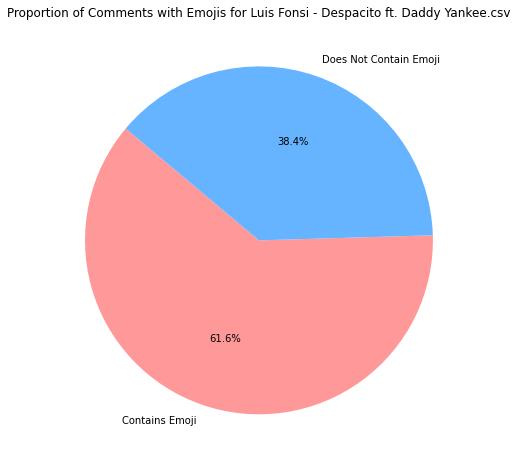

In [10]:
import matplotlib.pyplot as plt
# Count rows with and without emojis
emoji_counts = df['contains_emoji'].value_counts()
labels = ['Contains Emoji','Does Not Contain Emoji']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Comments with Emojis for Luis Fonsi - Despacito ft. Daddy Yankee.csv')
plt.show()

In [11]:
def count_emojis(text):
    return len(emoji_pattern.findall(text))
data_emoji = df[df['contains_emoji'] == True]
data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)
data_filtered = data_emoji[(data_emoji['emoji_count'] <= 4) & (data_emoji['comment'].str.len() <= 100)]
data_filtered

<ipython-input-11-9dc44fd67257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)


,user_id,username,comment,likes,replies,date,video,contains_emoji,emoji_count
3,UCbFmD4dlDiiTD0kDi0I81iA,@unboxinghonestreview619,Please pray my dad . He is no more. 🙏,0,0,2024-10-20T18:02:03Z,श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Or...,True,1
8,UCcWHlMeKy1JHOmaAIMI3NSw,@Subhaguli1234,🙏🙏,1,0,2024-10-20T17:51:37Z,श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Or...,True,1
10,UCr9PUVl8_V1Yom2_ySVHMKA,@rohinisathe4833,Jay shree Ram 🙏🙏🙏🙏🙏🌹🌹🌹🌹🌹🌹🌺🌺🌺🌺🌺🚩🚩🚩🚩🚩🚩,0,0,2024-10-20T17:51:25Z,श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Or...,True,1
11,UCcWHlMeKy1JHOmaAIMI3NSw,@Subhaguli1234,"Jay Shree Siya ram 🙏 , Jay hanuman 🙏🙏",1,0,2024-10-20T17:51:24Z,श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Or...,True,2
12,UCwjOL9XWjYli9XloixZWmwA,@debashissarker80,Joy joy Hanuman 🍫❤️❤️🙏🍫🍫🌹❤️❤️🙏🙏🙏🙏,0,0,2024-10-20T17:49:58Z,श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Or...,True,1
...,...,...,...,...,...,...,...,...,...
49993,UCPnYdps_I7zM_t6sFuHhzSg,@Riyansh-ff2xg,Jai Mata di..❤\nJai Shree Ram g..❤\nJai Hanuma...,7,0,2024-09-16T01:54:00Z,श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Or...,True,3
49994,UCca3PJaWyc5xUQsVSq22PsA,@Gaurarchna,Jai shree 🙏Ram. Jai Hanuman ji,1,0,2024-09-16T01:53:41Z,श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Or...,True,1
49996,UCVlDJ2K0laNkITQ8uKkvqUQ,@JoruBarvad,❤❤❤❤❤❤❤❤❤❤😊❤😊❤😊😊😊❤😊❤😊❤😊😊❤❤,2,0,2024-09-16T01:53:27Z,श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Or...,True,1
49997,UCNKEyFUHh8e9MKtCox_Fobg,@ArvindSinghOfficial-rj2bj,Hanuman chalisa hamesha suna jayega or sunaeng...,1,0,2024-09-16T01:53:23Z,श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Or...,True,1


In [ ]:
import os
from deep_translator import GoogleTranslator
from langdetect import detect
import pandas as pd
import re
def extract_emojis(text):
    """Extract all emojis from a given text."""
    return ''.join(emoji_pattern.findall(text))

# Define the function to translate text
def translate_to_english(row):
    try:
        text = row['comment']
        row_number = row.name + 1  # Get the row number (1-indexed)
        
        # Extract emojis
        emojis = extract_emojis(text)
        
        # Remove emojis before translation
        text_without_emojis = emoji_pattern.sub('', text).strip()
        
        # Handle emoji-only text or empty text
        if not text_without_emojis:
            print(f"Row {row_number}: Text contains only emojis or is empty: {text}")
            return text  # Return original text if no translatable content
        
        # Detect language
        detected_language = detect(text_without_emojis)
        print(f"Row {row_number}: Detected language: {detected_language}")

        # Translate if necessary
        if detected_language != 'en':
            translation = GoogleTranslator(target='en').translate(text_without_emojis)
        else:
            translation = text_without_emojis  # Keep the original if it's English

        # Append emojis to the translated text
        translated_with_emojis = f"{translation} {emojis}".strip()
        
        print(f"Row {row_number}: Original: {text}, Translated: {translated_with_emojis}")
        return translated_with_emojis
    except Exception as e:
        print(f"Row {row_number}: Error translating text: {text}, Error: {e}")
        return text
output_folder = './translated_comments_folder2'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'श्री हनुमान चालीसा 🌺🙏 Shree Hanuman Chalisa Original Video 🙏🌺 GULSHAN KUMAR  HARIHARAN Full HD.csv')

# Process each row and save results
with open(output_file, 'a', encoding='utf-8') as f:
    # Write header if the file is empty
    if os.path.getsize(output_file) == 0:
        f.write("row_number,original_comment,translated_comment\n")
    
    # Apply the translation function row by row
    for _, row in data_emoji.iterrows():
        row_number = row.name + 1
        original_comment = row['comment']
        translated_comment = translate_to_english(row)
        
        # Append the row to the CSV
        f.write(f"{row_number},{original_comment},{translated_comment}\n")
        print(f"Row {row_number} saved.")

Row 1: Detected language: hi
Row 1: Original: ❤प्रिय मित्रों ❤ हम सबका सदैव मंगल करने वाली श्री हनुमान चालीसा के ४०० करोड़ 4 बिलियन व्यूज पूरे हो गए हैं 🙏ये केवल आप ही के माध्यम से संभव हुआ है 🙏हम सभी के लिए अत्यंत गर्व का विषय है एवं ये और भी महत्वपूर्ण है की हमनें ये लक्ष्य हनुमान जी के प्रिय दिवस मंगलवार के दिन प्राप्त किया है। आप सबका ह्रदय से आभार ❤🌺🙏जय श्री हनुमान जी🙏🌺, Translated: Dear friends, Shri Hanuman Chalisa, which always blesses us all, has completed 400 crore 4 billion views. This has been possible only through you. It is a matter of immense pride for all of us and it is even more important that we have achieved this goal on Hanuman ji's favorite day, Tuesday. Heartfelt thanks to all of you. Jai Shri Hanuman ji. ❤❤🙏🙏❤🌺🙏🙏🌺
Row 1 saved.
Row 4: Detected language: en
Row 4: Original: Please pray my dad . He is no more. 🙏, Translated: Please pray my dad . He is no more. 🙏
Row 4 saved.
Row 6: Detected language: en
Row 6: Original: 20 October con soon raha hai bolo jay shree ra

Row 92: Original: जय श्री राम ❤ गुलशन कुमार जी अमर रहें ! 🚩, Translated: Jai Shri Ram, may Gulshan Kumar ji remain immortal! ❤🚩
Row 92 saved.
Row 93: Detected language: so
Row 93: Original: Jai siya Ram 🙏, Translated: Jai Siya Ram 🙏
Row 93 saved.
Row 94: Detected language: hi
Row 94: Original: जय श्री राम जी 🙏 जय हनुमान जी 🙏🙏🌺🌿🌿🌺🙏🧿, Translated: Hail Lord Ram, Hail Lord Hanuman 🧿 🙏🙏🙏🌺🌿🌿🌺🙏
Row 94 saved.
Row 95: Text contains only emojis or is empty: ❤
Row 95 saved.
Row 96: Detected language: hi
Row 96: Original: सभी बोलो जय जय श्री राम🚩🚩🚩🚩🚩, Translated: Everybody say Jai Jai Shri Ram 🚩🚩🚩🚩🚩
Row 96 saved.
Row 98: Detected language: hi
Row 98: Original: 1 नवंबर मे कोन कोन भक्त सुन रहा है बोलो जय श्रीराम ❤🎉, Translated: On 1st November, which devotee is listening, say Jai Shri Ram ❤🎉
Row 98 saved.
Row 99: Detected language: id
Row 99: Original: Jai shree Ram ji Jai bajrang bali ki jai mata sita ram ram ram ram ram ram ram ram ram ❤❤❤❤❤❤, Translated: Hail Lord Rama, Hail Bajrang Bali, Hail mo

Row 171: Original: 20. October ko sun raha hun 🚩🚩🚩🚩🙏🙏🙏🙏🙏, Translated: 20. I'm listening to October 🚩🚩🚩🚩🙏🙏🙏🙏🙏
Row 171 saved.
Row 172: Detected language: en
Row 172: Original: Jai Shree Ram ❤❤❤❤🙏 🙏🙏 
Jai Siya Ram ❤❤❤❤🙏🙏🙏🙏 
Shree Ram Chandra Prabhu Ki Jai ❤❤❤❤🙏🙏🙏 
SHREE RAM RAMA RAMETHI RAME RAME MANORAME SAHASRA NAMA THATULYAM RAMA NAMA VARANANE ❤❤❤❤❤❤❤❤❤❤❤❤❤🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😊
SHREE RAM RAMA RAMETHI RAME RAME MANORAME SAHASRA NAMA THATULYAM RAMA NAMA VARANANE ❤❤❤❤❤❤❤❤❤❤🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 
SHREE RAM RAMA RAMETHI RAME RAME MANORAME SAHASRA NAMA THATULYAM RAMA NAMA VARANANE ❤❤❤❤❤❤❤❤❤❤❤🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏 
😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊😊❤😊, Translated: Jai Shree Ram   
Jai Siya Ram  
Shree Ram Chandra Prabhu Ki Jai  
SHREE RAM RAMA RAMETHI RAME RAME MANORAME SAHASRA NAMA THATULYAM RAMA NAMA VARANANE 
SHREE RAM RAMA RAMETHI RAME RAME MANORAME SAHASRA NAMA THATULYAM RAMA NAMA VARANANE  
SHREE RAM RAMA RAMETHI RAME RAME MANORAME SAHASRA NAMA THATULYAM RAMA NAMA VARANANE ❤❤❤❤🙏🙏🙏❤❤❤❤🙏🙏🙏🙏❤❤❤❤🙏🙏🙏❤❤❤❤❤❤❤❤❤❤❤❤❤🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😊

Row 243: Original: Jai shree Ram ji Jai sr Hanuman ji ❤❤❤, Translated: Jai Shri Ram Ji, Jai Shri Hanuman Ji. ❤❤❤
Row 243 saved.
Row 244: Detected language: hi
Row 244: Original: जय बजरंग बली 🚩, Translated: Jai bajarangabalee 🚩
Row 244 saved.
Row 249: Detected language: hi
Row 249: Original: जय सियाराम 🚩🛐🛐🛐, Translated: Hail Siya Ram 🚩🛐🛐🛐
Row 249 saved.
Row 250: Detected language: en
Row 250: Original: Jai Shree Ram Jai Shree Hanuman🎉🎉🎉🎉🎉🙏🙏🙏🙏🙏💐💐💐💐💐, Translated: Jai Shree Ram Jai Shree Hanuman 🎉🎉🎉🎉🎉🙏🙏🙏🙏🙏💐💐💐💐💐
Row 250 saved.
Row 252: Detected language: so
Row 252: Original: Jay shree ram🙏, Translated: Jay shree ram 🙏
Row 252 saved.
Row 253: Detected language: so
Row 253: Original: Jay Hanuman jii ❤, Translated: Hail Hanuman ji ❤
Row 253 saved.
Row 254: Detected language: en
Row 254: Original: JAY shree Ram ❤, Translated: JAY shree Ram ❤
Row 254 saved.
Row 255: Detected language: en
Row 255: Original: Jai shree ram 🙏🙏🙏🙏🙏🙏🙏, Translated: Jai shree ram 🙏🙏🙏🙏🙏🙏🙏
Row 255 saved.
Row 257: Detected

Row 335: Original: जय श्री राम जय श्री राम जय श्री राम जय श्री राम जय श्री राम जय श्री राम जय श्री राम जय श्री राम जय श्री राम 🙏🙏🙏🚩🚩🚩, Translated: Jai Shri Ram Jai Shri Ram Jai Shri Ram Jai Shri Ram Jai Shri Ram Jai Shri Ram Jai Shri Ram Jai Shri Ram Jai Shri Ram Jai Shri Ram Jai Shri Ram 🙏🙏🙏🚩🚩🚩
Row 335 saved.
Row 336: Detected language: so
Row 336: Original: Jay Shree Ramji❤❤❤🎉🎉🎉😅😅😅Jay Bajrangbali, Translated: Jay Shree Ramji Jay Bajrangbali ❤❤❤🎉🎉🎉😅😅😅
Row 336 saved.
Row 339: Detected language: id
Row 339: Original: 20 October ko kon kon sun raha ha 😊😊, Translated: Who is listening to October 20 😊😊
Row 339 saved.
Row 341: Detected language: tl
Row 341: Original: Jay shri hanuman 🙏🙏💖💖, Translated: Jay shri hanuman 🙏🙏💖💖
Row 341 saved.
Row 344: Detected language: en
Row 344: Original: ❤best music in our life ❤❤jai shree ram ♥️♥️, Translated: best music in our life jai shree ram ❤❤❤♥️♥️
Row 344 saved.
Row 345: Detected language: fi
Row 345: Original: Jai shree ram ji jai shree hanuman ji 🙏

Row 419: Original: Jai shree Ram ji ❤❤❤❤❤❤❤❤❤
Jai shree Hanuman ji ❤❤❤❤❤❤❤❤❤, Translated: Jai shree Ram ji 
Jai shree Hanuman ji ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 419 saved.
Row 421: Detected language: so
Row 421: Original: Jay sri ram 🙏, Translated: Jay sri ram 🙏
Row 421 saved.
Row 422: Detected language: so
Row 422: Original: ❤❤❤❤❤❤❤❤❤❤Jay Bajrangbali,Jay Bajrangbali,Jay Bajrangbali Thakur dekho tumi rokkha koro Amar matha thanda hocheyna kichutei hocheynaaaa, Translated: Jay Bajrangbali, Jay Bajrangbali, Jay Bajrangbali Thakur dekho tumi rokkha koro Amar matha thanda hocheyna kichutei hocheynaaa ❤❤❤❤❤❤❤❤❤❤
Row 422 saved.
Row 425: Detected language: mr
Row 425: Original: जय श्रीराम 🙏🙏🙏🙏🙏🌹🌹🌹🌹🌹🌺🌺🌺🌺🌺🚩🚩🚩🚩🚩, Translated: Jai Shri Ram 🙏🙏🙏🙏🙏🌹🌹🌹🌹🌹🌺🌺🌺🌺🌺🚩🚩🚩🚩🚩
Row 425 saved.
Row 426: Detected language: en
Row 426: Original: Jay shree Ram ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩, Translated: Jay shree Ram ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🛕🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩🚩
Row 426 

Row 479: Original: Jay shree Ram ♈, Translated: Jay shree Ram ♈
Row 479 saved.
Row 480: Detected language: id
Row 480: Original: 🙏Jai Shree Sitaram Ji 😊🙏
🙏Jai Shree Ram Ji 😊🙏
🙏Jai Shree Kashtbhanjan Hanuman Dada Ji 😊🙏🧿, Translated: Jai Shree Sitaram Ji 
Jai Shree Ram Ji 
Jai Shree Kashtbhanjan Hanuman Dada Ji 🧿 🙏😊🙏🙏😊🙏🙏😊🙏
Row 480 saved.
Row 481: Detected language: bn
Row 481: Original: জয় শ্ৰী ৰাম🚩🙏, Translated: Jai Shri Ram 🚩🙏
Row 481 saved.
Row 482: Detected language: so
Row 482: Original: Jay shree ram🙏, Translated: Jay shree ram 🙏
Row 482 saved.
Row 483: Detected language: id
Row 483: Original: Jai Shree ram ❤❤❤🚩🚩🚩🚩jai hanuman baba🚩🚩🚩, Translated: Jai Shree ram jai hanuman baba ❤❤❤🚩🚩🚩🚩🚩🚩🚩
Row 483 saved.
Row 484: Detected language: en
Row 484: Original: Hanuman Chalisa is The Best ❤, Translated: Hanuman Chalisa is The Best ❤
Row 484 saved.
Row 485: Detected language: sw
Row 485: Original: Jai shree Ram ji 🙏🚩, Translated: Jai shree Ram ji 🙏🚩
Row 485 saved.
Row 486: Detected language:

Row 526: Original: ❤❤jai siya Ram Ram ji ❤❤jai Hanuman ji ❤❤ Namo Namah ji ❤❤ aap meri manokamna Puri karo ji ❤❤ aap sab par apni kripa banaye rakhna ji aap sab par apni kripa banaye rakhna ji ❤❤jai guru dev ji ❤❤ Namo Namah ji ❤❤, Translated: Jai Siya Ram Ram ji Jai Hanuman ji Namo Namah ji, please fulfill my wish, please shower your blessings on everyone, Rakhina ji, please shower your blessings on everyone, Rakhina ji, Jai Guru Dev ji Namo Namah ji ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 526 saved.
Row 532: Detected language: sw
Row 532: Original: Jai hanuman ji 🙏🏻🙏🏻 Jai shri bala ji 🙏🏻🙏🏻, Translated: Hail Lord Hanuman, Hail Lord Bala 🙏🏻🙏🏻🙏🏻🙏🏻
Row 532 saved.
Row 533: Detected language: en
Row 533: Original: 🌹 Jai 🌹 love 🌹 you 🌹 shree 🌹 Ram 🌹 love ?🌹? you 🌹 thank 🌹 you 🌹🌹🌹🌹🌹🌹 Jai 🌹 love 🌹 you 🌹 bajrangbali 🌹 love 🌹 you 🌹 thank 🌹 you🌹🌹🌹🌹💐💐💐💐💐 Jai 🌹 love 🌹 you 🌹 hanuman 🌹 love 💐 you 💐 thank 💐 you 🌹🌹🌹🌹🌹🌹 love you 💗, Translated: Jai  love  you  shree  Ram  love ?? you  thank  you  Jai  love  you  bajrangba

Row 591: Original: Jai shree RAM ❤🎉😊Jai bajrang bali ❤🎉😊🪔🏝️🤎😆🤝😁🤩💅💐💝🧡💜💛💚😇😎💞🌺🌷💐🌹💕💖💗💓❤️🎆🌈🏵️💮🌸🌠🙂🏞️🤟👍🥳🤩😍🥰🙂☺️😊🤗😶‍🌫️⭐🌟✨🌝🌞🌛🌜💯🎉🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏, Translated: Jai shree RAM Jai bajrang bali 🪔🤎🤝🤩🧡🤟🥳🤩🥰🤗 ❤🎉😊❤🎉😊🏝️😆😁💅💐💝💜💛💚😇😎💞🌺🌷💐🌹💕💖💗💓❤️🎆🌈🏵️💮🌸🌠🙂🏞️👍😍🙂☺️😊😶🌫️⭐🌟✨🌝🌞🌛🌜💯🎉🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏
Row 591 saved.
Row 592: Detected language: fi
Row 592: Original: jay hanumanjiii bless my family 🙏🙏🙏🙏🙏, Translated: jay hanumanjiii bless my family 🙏🙏🙏🙏🙏
Row 592 saved.
Row 594: Detected language: id
Row 594: Original: Jai shree Ram 
Jai bajrang bali ❤❤, Translated: Jai Shree Ram 
Jai bajrang bali ❤❤
Row 594 saved.
Row 596: Detected language: so
Row 596: Original: Jai shree Ram ji 🙏, Translated: Jai Shri Ram Ji 🙏
Row 596 saved.
Row 597: Detected language: so
Row 597: Original: Radha Rani😊, Translated: Radha Rani 😊
Row 597 saved.
Row 598: Detected language: id
Row 598: Original: Ram❤, Translated: Ram ❤
Row 598 saved.
Row 599: Detected language: id
Row 599: Original: Jai Jai Shree Ram 🚩🚩, Translated: Jai Jai 

Row 677: Original: 🙏जय श्री राम🙏, Translated: Jai Shri Ram 🙏🙏
Row 677 saved.
Row 685: Detected language: so
Row 685: Original: Jai shree Ram ji 🙏, Translated: Jai Shri Ram Ji 🙏
Row 685 saved.
Row 688: Detected language: so
Row 688: Original: Jai shree Ram ji 🙏, Translated: Jai Shri Ram Ji 🙏
Row 688 saved.
Row 690: Detected language: so
Row 690: Original: Jai shree Ram ji 🙏, Translated: Jai shree Ram ji 🙏
Row 690 saved.
Row 691: Detected language: so
Row 691: Original: t  t ?o o clockc❤❤❤ xx x.    X. """". X.       X.                ’ cc. X xx xx xx cc.  Xccxx.               C. Z                                                        '😢. . ".       x. Xxcxxxx c.                        "          c x.     Xc xcxccxsx xx.  C           '.      X xx xx xx xx. Ttt❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤yff😢😢😢😢😮😢❤❤❤❤❤❤❤❤❤, Translated: t  t ?o o clockc xx x.    X. """". X.       X.                ’ cc. X xx xx xx cc.  Xccxx.               C. Z                                         

Row 756: Original: जय श्री राम 🙏🙏🙏🙏🙏🙏, Translated: Jai Shri Ram 🙏🙏🙏🙏🙏🙏
Row 756 saved.
Row 758: Text contains only emojis or is empty: ❤❤
Row 758 saved.
Row 762: Detected language: so
Row 762: Original: Jay shree ram 🙏❤🥺, Translated: Jay shree ram 🥺 🙏❤
Row 762 saved.
Row 764: Detected language: id
Row 764: Original: ❤rekha Jat 5:29, Translated: rekha jat 5:29 ❤
Row 764 saved.
Row 767: Detected language: fr
Row 767: Original: My favourite song ❤❤❤❤❤❤, Translated: My favourite song ❤❤❤❤❤❤
Row 767 saved.
Row 773: Detected language: mr
Row 773: Original: 🙏जय श्री राम🚩, Translated: Jai Shri Ram 🙏🚩
Row 773 saved.
Row 774: Detected language: sw
Row 774: Original: Jai shree ram ji Jai shree krishna ji jai shree Hanuman ji ki jai har har Mahadev ji ki kripa bani rahe 🌻🌻🌻🌻🌻🌹🌹🌹🌹🌹💐💐💐💐💐🌺🌺🌺🌺🌺🌺🌷🌷🌷🌷🌷🌷🌷🌷🌷🌷🌷🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏, Translated: Hail Shree Ram ji, Hail Shree Krishna ji, Hail Shree Hanuman ji, Hail Har, may Mahadev ji's blessings be upo

Row 842: Original: 🚩🚩Jay shree Ram 🚩🚩
🚩🚩Jay बजरंग bali 🚩🚩, Translated: Hail Shree Ram 
Hail Bajrang Bali 🚩🚩🚩🚩🚩🚩🚩🚩
Row 842 saved.
Row 843: Detected language: en
Row 843: Original: Remove my  All Nagetivity Jay  Jay Bajarangbali 🙏, Translated: Remove my  All Nagetivity Jay  Jay Bajarangbali 🙏
Row 843 saved.
Row 844: Text contains only emojis or is empty: 🙏🏻🙏🏻🙏🏻🙏🏻🙏🏻
Row 844 saved.
Row 846: Detected language: id
Row 846: Original: Jay Shri Ram bolunga❤❤❤❤ Hanuman❤❤😮😮😮😮😮😮, Translated: Hail Lord Ram, Bolunga Hanuman ❤❤❤❤❤❤😮😮😮😮😮😮
Row 846 saved.
Row 848: Detected language: ne
Row 848: Original: जय श्री राम 🙏🙏 
    जय हनुमान❤❤, Translated: Hail to Lord Ram Hail to Lord Hanuman 🙏🙏❤❤
Row 848 saved.
Row 849: Detected language: mr
Row 849: Original: जय श्री राम ❤, Translated: Jai Shri Ram ❤
Row 849 saved.
Row 850: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 850 saved.
Row 851: Detected language: id
Row 851: Original: Jai Hanuman dada ❤, Translated: Jai Hanuman chest ❤
Row 851 saved.

Row 905: Original: Jay ho Bajrangbali 🙏🙏🙏🙏🙏, Translated: Jay ho Bajrangbali 🙏🙏🙏🙏🙏
Row 905 saved.
Row 906: Detected language: gu
Row 906: Original: જય શ્રીરામ 🙏, Translated: Jai Sriram 🙏
Row 906 saved.
Row 908: Detected language: so
Row 908: Original: Jay ho Bajrangbali 🙏🙏🙏🙏🙏, Translated: Jay ho Bajrangbali 🙏🙏🙏🙏🙏
Row 908 saved.
Row 909: Detected language: so
Row 909: Original: Jay ho Bajrangbali 🙏🙏🙏🙏🙏, Translated: Jay ho Bajrangbali 🙏🙏🙏🙏🙏
Row 909 saved.
Row 910: Detected language: tl
Row 910: Error translating text: Jay ho Bajrangbali 🙏🙏🙏🙏🙏, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 910 saved.
Row 911: Detected language: id
Row 911: Error translating text: Ram 🚩🚩🚩🚩🚩, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per seco

Row 941: Error translating text: Joy honuman ❤❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 941 saved.
Row 942: Detected language: en
Row 942: Original: Joy shree ram ❤❤, Translated: Joy shree ram ❤❤
Row 942 saved.
Row 948: Detected language: en
Row 948: Original: Jay shree Ram 🛕🛕🛕🛕🛕🛕🛕🏰, Translated: Jay shree Ram 🛕🛕🛕🛕🛕🛕🛕🏰
Row 948 saved.
Row 949: Detected language: id
Row 949: Error translating text: Jai bajrangbali 🌹🌹🙏🙏🙏, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 949 saved.
Row 950: Detected language: id
Row 950: Error translating text: Jai veer bajrangi ❤❤, Error: Server Error: You made too many

Row 986: Error translating text: हम जब से हनुमान जी का भजन सुनने लगा मुझे बहुत ही अच्छा लगता हैं जय बजरंग बली ♈ जय श्री राम ❤❤❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 986 saved.
Row 987: Detected language: tl
Row 987: Error translating text: Jay Hanuman 🙏🙏🙏🙏🙏, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 987 saved.
Row 988: Detected language: mr
Row 988: Error translating text: जय श्री राम 👏🚩🚩, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can